In [1]:
1 + 1

2

C:\Users\amz12\AppData\Local\Temp\ipykernel_38736\1624546942.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\amz12\AppData\Local\Temp\ipykernel_38736\1624546942.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\amz12\AppData\Local\Temp\ipykernel_38736\1624546942.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

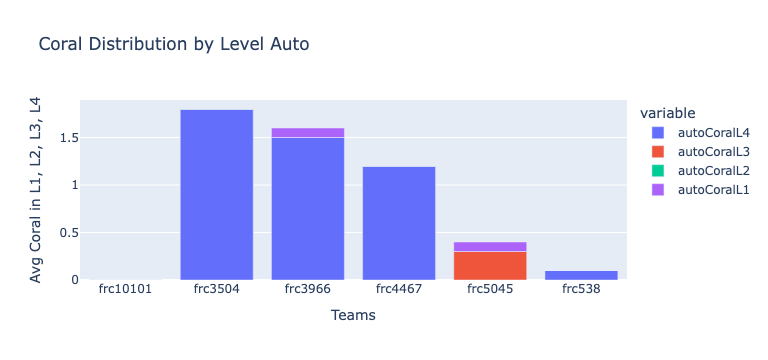

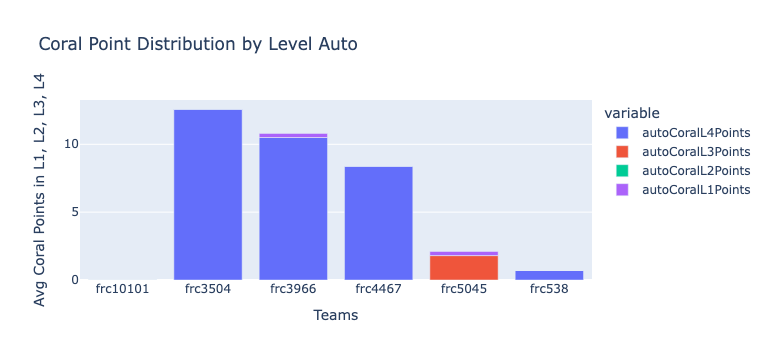

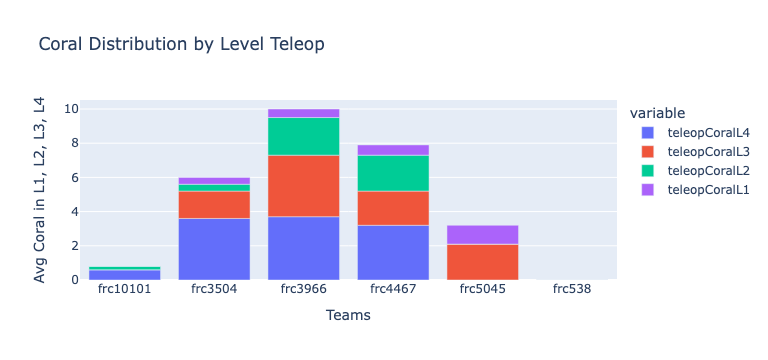

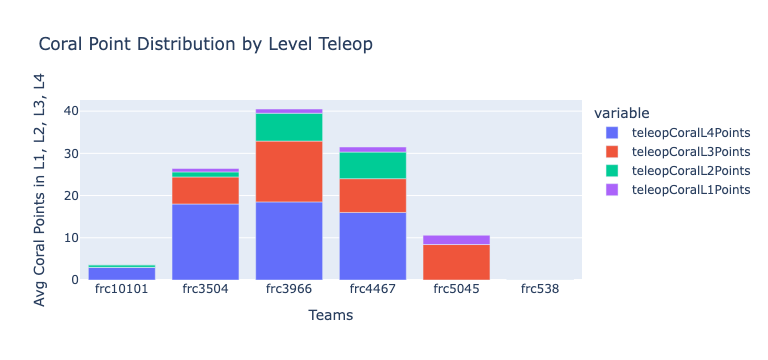

In [41]:
import pandas as pd
import plotly.express as px
df = pd.read_csv("data/2025tnkn/match_scouting.csv")
teams = ["frc3504", "frc4467", "frc10101", "frc5045", "frc538", "frc3966"]
selected_teams = df[df["team_key"].isin(teams)]
# print(selected_teams)
avg = selected_teams.groupby("team_key").mean(numeric_only = True).reset_index()
# print(avg)
avg_by_point = avg[["team_key", "autoCoralL4", "autoCoralL3", "autoCoralL2", "autoCoralL1"]]
# print("Before")
# print(avg_by_point)
avg_by_point["autoCoralL4Points"] = avg["autoCoralL4"] * 7
avg_by_point["autoCoralL3Points"] = avg["autoCoralL3"] * 6
avg_by_point["autoCoralL2Points"] = avg["autoCoralL2"] * 4
avg_by_point["autoCoralL1Points"] = avg["autoCoralL1"] * 3
# print("After")
# print(avg_by_point)

avg_by_point_teleop = avg[["team_key", "teleopCoralL4", "teleopCoralL3", "teleopCoralL2", "teleopCoralL1"]]
avg_by_point_teleop["teleopCoralL4Points"] = avg["teleopCoralL4"] * 5
avg_by_point_teleop["teleopCoralL3Points"] = avg["teleopCoralL3"] * 4
avg_by_point_teleop["teleopCoralL2Points"] = avg["teleopCoralL2"] * 3
avg_by_point_teleop["teleopCoralL1Points"] = avg["teleopCoralL1"] * 2

# Avg Auto Coral by Team
fig = px.bar(avg, x = "team_key", y = ["autoCoralL4", "autoCoralL3", "autoCoralL2", "autoCoralL1"], title = "Coral Distribution by Level Auto")
fig.update_layout(xaxis_title = "Teams", yaxis_title = "Avg Coral in L1, L2, L3, L4")
fig.show()

# Avg Auto Coral Points by Team
fig = px.bar(avg_by_point, x = "team_key", y = ["autoCoralL4Points", "autoCoralL3Points", "autoCoralL2Points", "autoCoralL1Points"], title = "Coral Point Distribution by Level Auto")
fig.update_layout(xaxis_title = "Teams", yaxis_title = "Avg Coral Points in L1, L2, L3, L4")
fig.show()

# Avg TELEOP Coral by Team
fig = px.bar(avg, x = "team_key", y = ["teleopCoralL4", "teleopCoralL3", "teleopCoralL2", "teleopCoralL1"], title = "Coral Distribution by Level Teleop")
fig.update_layout(xaxis_title = "Teams", yaxis_title = "Avg Coral in L1, L2, L3, L4")
fig.show()

# Avg TELEOP Coral Points by Team
fig = px.bar(avg_by_point_teleop, x = "team_key", y = ["teleopCoralL4Points", "teleopCoralL3Points", "teleopCoralL2Points", "teleopCoralL1Points"], title = "Coral Point Distribution by Level Teleop")
fig.update_layout(xaxis_title = "Teams", yaxis_title = "Avg Coral Points in L1, L2, L3, L4")
fig.show()

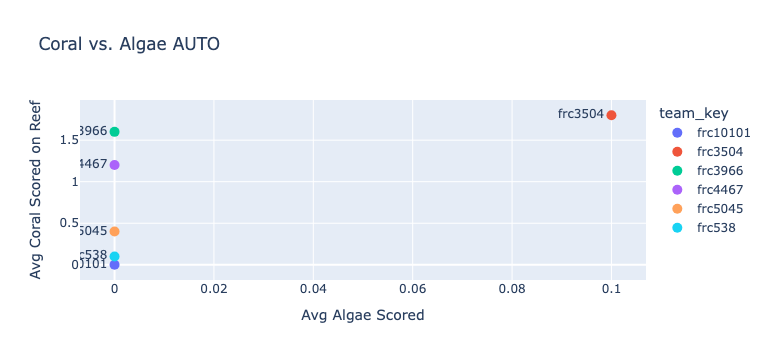

In [58]:
import pandas as pd
import plotly.express as px
df = pd.read_csv("data/2025tnkn/match_scouting.csv")
teams = ["frc3504", "frc4467", "frc10101", "frc5045", "frc538", "frc3966"]
selected_teams = df[df["team_key"].isin(teams)]

# Coral scored on reef vs. auto scored
avg = selected_teams.groupby("team_key").mean(numeric_only = True).reset_index()
fig = px.scatter(avg, x = "totalAutoAlgae", y = "totalAutoCoral", color = "team_key", text = "
                 title = "Coral vs. Algae AUTO")
fig.update_layout(xaxis_title = "Avg Algae Scored", yaxis_title = "Avg Coral Scored on Reef")
fig.update_traces(marker = dict(
                                symbol = "circle", size = 10),
                  textposition = "middle left")
fig.show()

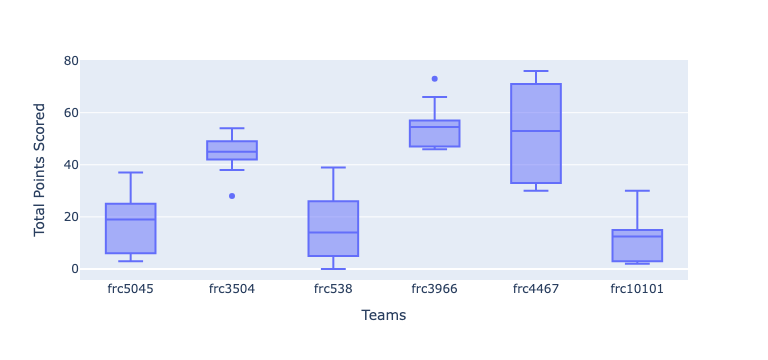

In [7]:
import pandas as pd
import plotly.express as px
df = pd.read_csv("data/2025tnkn/match_scouting.csv")
teams = ["frc3504", "frc4467", "frc10101", "frc5045", "frc538", "frc3966"]
selected_teams = df[df["team_key"].isin(teams)]

# box and whisker
# avg = selected_teams.groupby("team_key").mean(numeric_only = True).reset_index()
fig = px.box(selected_teams, x = "team_key", y = "contributedPoints")
fig.update_layout(xaxis_title = "Teams", yaxis_title = "Total Points Scored")
# fig.show()

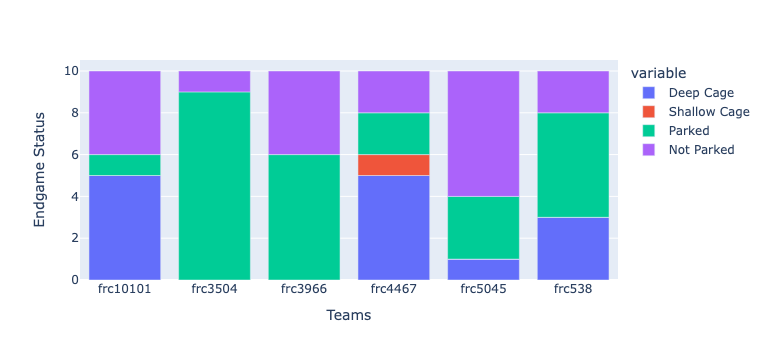

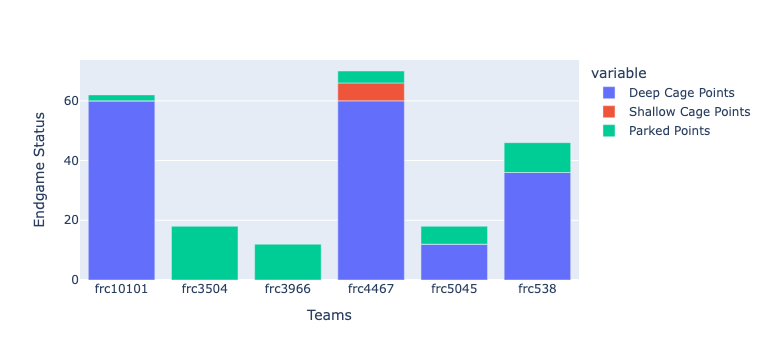

In [35]:
df = pd.read_csv("data/2025tnkn/match_scouting.csv")
teams = ["frc3504", "frc4467", "frc10101", "frc5045", "frc538", "frc3966"]
selected_teams = df[df["team_key"].isin(teams)]

# endgame status counter
endgame_df = selected_teams.groupby('team_key')["bargeStatus"].value_counts().unstack(fill_value=0).reset_index()
# print(endgame_df)
fig = px.bar(endgame_df, x = "team_key", y = ["Deep Cage", "Shallow Cage", "Parked", "Not Parked"])
fig.update_layout(xaxis_title = "Teams", yaxis_title = "Endgame Status")
fig.show()

# endgame status by points
endgame_df["Deep Cage Points"] = endgame_df["Deep Cage"] * 12
endgame_df["Shallow Cage Points"] = endgame_df["Shallow Cage"] * 6
endgame_df["Parked Points"] = endgame_df["Parked"] * 2
fig2 = px.bar(endgame_df, x = "team_key", y = ["Deep Cage Points", "Shallow Cage Points", "Parked Points"])
fig2.update_layout(xaxis_title = "Teams", yaxis_title = "Endgame Status by Points")
fig2.show()

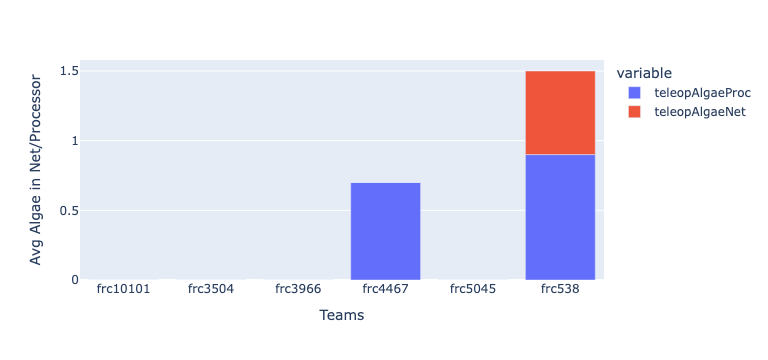

In [37]:
df = pd.read_csv("data/2025tnkn/match_scouting.csv")
teams = ["frc3504", "frc4467", "frc10101", "frc5045", "frc538", "frc3966"]
selected_teams = df[df["team_key"].isin(teams)]

# Algae Processor/Net in TELEOP
algae_df = selected_teams.groupby('team_key').mean(numeric_only = True).reset_index()
fig = px.bar(algae_df, x = "team_key", y = ["teleopAlgaeProc", "teleopAlgaeNet"])
fig.update_layout(xaxis_title = "Teams", yaxis_title = "Avg Algae in Net/Processor")
fig.show()